# Une climatologie et au lit

## Imports de l'application

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from modules.data_loader import DataSpliter

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Paramètres de l'application

In [273]:
dataset_name = 'temperatures.csv'
filtered_dataset_name = 'filtered_temperatures.csv'
DATA_PATH = 'data/'
DATASET_PATH = DATA_PATH + dataset_name
FILTERED_DATASET_PATH = DATA_PATH + filtered_dataset_name
CURATED_PATH = DATA_PATH + 'curated/'
COUNTRY = CURATED_PATH + 'country/'
REGION = CURATED_PATH + 'region/'

data_spliter = DataSpliter()

## Import et filtrage du dataset général

In [274]:
global_dataset = pd.read_csv(DATASET_PATH, sep=',', encoding='utf-8')
print(dataset_name, "importé avec succès.")
print (global_dataset.info())

temperatures.csv importé avec succès.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB
None


In [275]:
global_dataset[['Region', 'Country', 'State', 'City']] = global_dataset[['Region', 'Country', 'State', 'City']].astype('string')

In [276]:
# Vérification des valeurs nulles
nancount = global_dataset["Region"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Region\'.")
nancount = global_dataset["Country"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Country\'.")
nancount = global_dataset["City"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'City\'.")
nancount = global_dataset["Month"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Month\'.")
nancount = global_dataset["Day"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Day\'.")
nancount = global_dataset["Year"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Year\'.")
nancount = global_dataset["AvgTemperature"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'AvgTemperature\'.")

Il y a  0  valeurs nulles dans la colonne 'Region'.
Il y a  0  valeurs nulles dans la colonne 'Country'.
Il y a  0  valeurs nulles dans la colonne 'City'.
Il y a  0  valeurs nulles dans la colonne 'Month'.
Il y a  0  valeurs nulles dans la colonne 'Day'.
Il y a  0  valeurs nulles dans la colonne 'Year'.
Il y a  0  valeurs nulles dans la colonne 'AvgTemperature'.


In [277]:
# Vérification des dates
print("Nombre d'enregistrements dont l'année est inférieure à 1995 : ", global_dataset['Year'][global_dataset['Year']<1995].count())
print("Nombre d'enregistrements dont l'année est supérieure à 2019 : ", global_dataset['Year'][global_dataset['Year']>2019].count())

Nombre d'enregistrements dont l'année est inférieure à 1995 :  440
Nombre d'enregistrements dont l'année est supérieure à 2019 :  38810


In [278]:
global_dataset = global_dataset[global_dataset['Year']>1994]
global_dataset = global_dataset[global_dataset['Year']<2020]
print("Nombre d'enregistrements dont l'année est inférieure à 1995 : ", global_dataset['Year'][global_dataset['Year']<1995].count())
print("Nombre d'enregistrements dont l'année est supérieure à 2019 : ", global_dataset['Year'][global_dataset['Year']>2019].count())

Nombre d'enregistrements dont l'année est inférieure à 1995 :  0
Nombre d'enregistrements dont l'année est supérieure à 2019 :  0


In [279]:
# Conversion °F en °C
global_dataset['AvgTemperature'] = (global_dataset['AvgTemperature'] - 32)/1.8

In [280]:
# Suppression des températures biaisées
print("Nombre d'enregistrements dont la température est inférieure à -72° : ", global_dataset['AvgTemperature'][global_dataset['AvgTemperature']<-72].count())
global_dataset = global_dataset[global_dataset['AvgTemperature']>-72]
print("Nombre d'enregistrements dont la température est inférieure à -72° : ", global_dataset['AvgTemperature'][global_dataset['AvgTemperature']<-72].count())

Nombre d'enregistrements dont la température est inférieure à -72° :  79164
Nombre d'enregistrements dont la température est inférieure à -72° :  0


In [281]:
print (global_dataset.info())

# Export en CSV
global_dataset.to_csv(DATA_PATH + 'filtered_temperatures.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2787913 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          string 
 1   Country         string 
 2   State           string 
 3   City            string 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), string(4)
memory usage: 191.4 MB
None


## Récupération du jeu filtré (pour ne pas refaire le filtrage)

In [282]:
global_dataset = pd.read_csv(FILTERED_DATASET_PATH , sep=',', encoding='utf-8')

## 1. Les températures moyennes françaises de 1995 à 2019

In [283]:
# Split par pays
data_spliter.split_data_country()

In [284]:
data_france = pd.read_csv(COUNTRY + 'France.csv' , sep=',', encoding='utf-8')

temp_france = data_france[['Year', 'AvgTemperature']].groupby('Year').agg({'AvgTemperature': 'mean'})

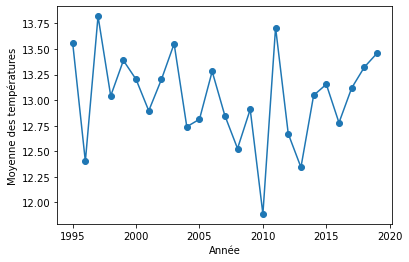

In [285]:
plt.plot(temp_france['AvgTemperature'], marker='o')
plt.xlabel('Année')
plt.ylabel('Moyenne des températures')
plt.show()

In [286]:
# Export en CSV
temp_france.to_csv(CURATED_PATH + 'requete1.csv')

## 2. L'évolution moyenne de la témparature chaque mois de l'année (sur toutes les années donc) de chaque région du globe (à l'aide de subplots, soit plusieurs diagramme sur un seul affichage)

In [287]:
mean_month = global_dataset[['Region', 'Month', 'AvgTemperature']].groupby(['Region', 'Month']).agg({'AvgTemperature': 'mean'})

In [288]:
mean_month.head()

AvgTemperature
Region Month                
Africa 1           22.522406
       2           23.160848
       3           23.724800
       4           23.832578
       5           23.879234

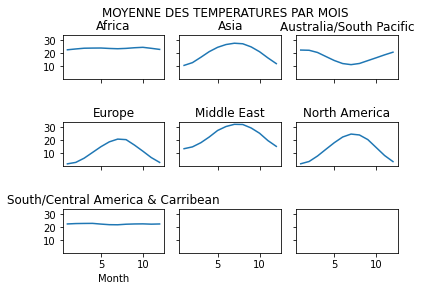

In [289]:
groupby_regions = global_dataset.groupby('Region')

fig, axs = plt.subplots(ncols=3, nrows=3, sharex='col', sharey=True, gridspec_kw={'hspace': 1, 'wspace': 0.15})
fig.suptitle("MOYENNE DES TEMPERATURES PAR MOIS")
fig.legend

axs = axs.flat

for region, ax in zip(groupby_regions, axs):
    ax.set_title(region[0])
    region[1].groupby('Month').agg({'AvgTemperature': 'mean'}).plot(ax=ax, label=False)
    ax.get_legend().remove()

plt.show()


## 3. Le classement graphique des pays les plus chauds au monde

In [290]:
top_warm = global_dataset[['Country', 'AvgTemperature']].groupby('Country').agg({'AvgTemperature': 'mean'}).sort_values(by='AvgTemperature', ascending=False)[:30]

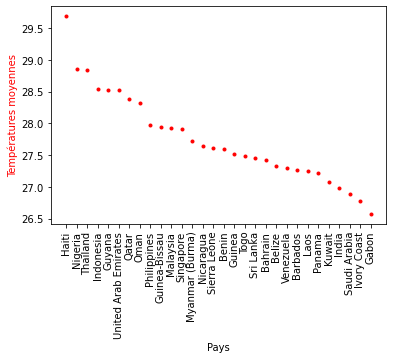

In [291]:
plt.plot(top_warm['AvgTemperature'], marker='.', linewidth=0, color = 'red')
plt.xlabel('Pays')
plt.xticks(rotation=90)
plt.ylabel('Températures moyennes', color='red')
plt.show()

In [292]:
# Export en CSV
temp_france.to_csv(CURATED_PATH + 'requete3.csv')

## 4. Le classement graphique des pays les plus froids au monde

In [293]:
top_cold = global_dataset[['Country', 'AvgTemperature']].groupby('Country').agg({'AvgTemperature': 'mean'}).sort_values(by='AvgTemperature', ascending=True)[:30]

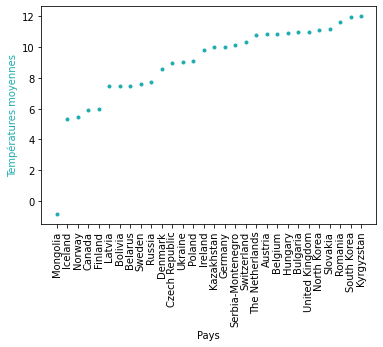

In [294]:
plt.plot(top_cold['AvgTemperature'], marker='.', linewidth=0, color = '#1eacb0')
plt.xlabel('Pays')
plt.xticks(rotation=90)
plt.ylabel('Températures moyennes', color='#1eacb0')
plt.show()

In [295]:
# Export en CSV
temp_france.to_csv(CURATED_PATH + 'requete4.csv')

## 5. L'évolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019 sur un même graphique

In [312]:
# Récupération des valeurs propres aux pays concernés
temp_haiti = pd.read_csv(COUNTRY + 'Haiti.csv' , sep=',', encoding='utf-8')
temp_mongolie = pd.read_csv(COUNTRY + 'Mongolia.csv' , sep=',', encoding='utf-8')

In [313]:
# Regroupement des températures par années
temp_haiti = temp_haiti[['Year', 'AvgTemperature']].groupby('Year').agg({'AvgTemperature': 'mean'})
temp_mongolie = temp_mongolie[['Year', 'AvgTemperature']].groupby('Year').agg({'AvgTemperature': 'mean'})

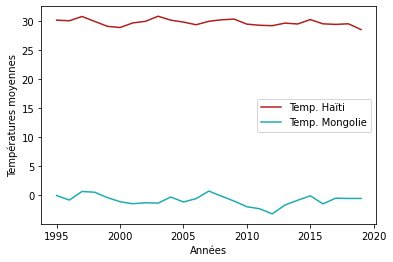

In [298]:
plt.plot(temp_haiti['AvgTemperature'], label = "Temp. Haïti", color = '#b01e1e')
plt.plot(temp_mongolie['AvgTemperature'], label = "Temp. Mongolie", color = '#1eacb0')
plt.xlabel('Années')
plt.ylabel('Températures moyennes')
plt.legend()
plt.legend()
plt.show()

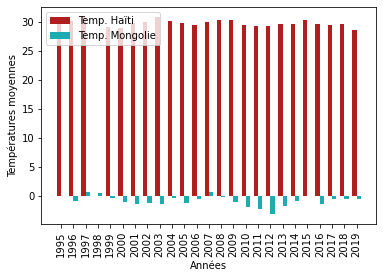

In [319]:
# Retrait de l'année qui manque au dataset de Haïti
# temp_mongolie = temp_mongolie[temp_mongolie.index!=1998]

# Ajout de la ligne 1998 à Haïti
temp_haiti.loc[1998] = [0]
temp_haiti=temp_haiti.sort_values(by='Year', ascending=True)

# Position sur l'axe des x pour chaque étiquette
position = np.arange(len(temp_mongolie.index))
# Largeur des barres
largeur = .35

# Création de la figure et d'un set de sous-graphiques
fig, ax = plt.subplots()
r1 = ax.bar(position - largeur/2, temp_haiti['AvgTemperature'], largeur, label = "Temp. Haïti", color = '#b01e1e')
r2 = ax.bar(position + largeur/2, temp_mongolie['AvgTemperature'], largeur, label = "Temp. Mongolie", color = '#1eacb0')
plt.xlabel('Années')
plt.ylabel('Températures moyennes')
plt.legend()

# Modification des marques sur l'axe des x et de leurs étiquettes
ax.set_xticks(position)
ax.set_xticklabels(temp_mongolie.index)
plt.xticks(rotation=90)

plt.show()

## 6. L'évolution de la température moyenne de la ville de Paris.

## 7. La température moyenne de chaque pays sur une carte sur la période 2010-2019